# 0.1_ss_math
- 数値計算系、chap4

In [2]:
s = 0

In [3]:
for i in range(1000):
        s += 0.001

In [4]:
s

1.0000000000000007

### やっちゃダメ

In [5]:
i = 0
s = 0
while s != 1.:
        print(s)
        s += 0.1
        i += 1
        if i > 12:
                break
                

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2


### 回避方法

In [7]:
eps = 1e-10
s = 0
while (abs(s-1.)) > eps:
        print(s)
        s += 0.1
print(s)

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999


## 演算による桁落ち

In [8]:
import numpy as np

In [9]:
def qeq(a, b, c):
        d = np.sqrt(b**2 - 4*a*c)
        return ((-b+d)/(2*a), (-b-d)/(2*a))

In [10]:
qeq(1,5,6)

(-2.0, -3.0)

In [11]:
qeq(1, 1.000000001, 0.000000001)

(-1.0000000272292198e-09, -1.0)

In [12]:
np.sqrt(1.000000001**2 - 4 * 1 * 0.000000001)

0.999999999

#### 解消方法

In [13]:
def qeq(a, b, c):
        alpha = (-b - np.sign(b) * np.sqrt(b**2 - 4*a*c))/(2*a)
        beta = c/(a*alpha)
        return (alpha, beta)

In [14]:
qeq(1, 1.000000001, 0.000000001)

(-1.0, -1e-09)

## 数値範囲の考慮

In [15]:
def softplus(x):
        return np.log(1 + np.exp(x))

In [16]:
softplus(-1)

0.31326168751822286

In [17]:
softplus(0)

0.6931471805599453

In [18]:
softplus(1000)

/Users/shouta_shimizu/.pyenv/versions/3.7.0/envs/essense/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


inf

In [19]:
def softplus(x):
        return max(0, x) + np.log(1 + np.exp(-abs(x)))

In [20]:

softplus(-1)

0.31326168751822286

In [21]:

softplus(0)

0.6931471805599453

In [22]:

softplus(1000)

1000.0

In [23]:
softplus(-10000)


0.0

### Contour Plot

In [24]:
x = np.array([1, 2, 3])

In [25]:
y = np.array([4, 5, 6])

In [26]:
xmesh, ymesh = np.meshgrid(x, y)

In [27]:
xmesh

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [28]:
def f(x, y):
        return x**2 + y**2/4

In [40]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)

In [30]:
xmesh, ymesh = np.meshgrid(x, y)

In [32]:
xmesh

array([[-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       ...,
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ],
       [-5.        , -4.96655518, -4.93311037, ...,  4.93311037,
         4.96655518,  5.        ]])

In [34]:
z = f(xmesh, ymesh)

In [35]:
z

array([[31.25      , 30.9166704 , 30.5855779 , ..., 30.5855779 ,
        30.9166704 , 31.25      ],
       [31.1666676 , 30.83333799, 30.5022455 , ..., 30.5022455 ,
        30.83333799, 31.1666676 ],
       [31.08389448, 30.75056487, 30.41947238, ..., 30.41947238,
        30.75056487, 31.08389448],
       ...,
       [31.08389448, 30.75056487, 30.41947238, ..., 30.41947238,
        30.75056487, 31.08389448],
       [31.1666676 , 30.83333799, 30.5022455 , ..., 30.5022455 ,
        30.83333799, 31.1666676 ],
       [31.25      , 30.9166704 , 30.5855779 , ..., 30.5855779 ,
        30.9166704 , 31.25      ]])

In [36]:
colors=['0.1','0.3','0.5','0.7']

In [37]:
levels = [1, 2, 3, 4, 5]

In [38]:
import matplotlib.pyplot as plt

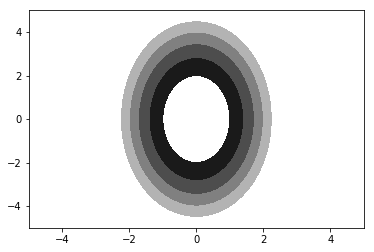

In [42]:
plt.contourf(x, y, z, colors=colors, levels=levels)

# 数理最適化

In [1]:
from scipy import optimize
import numpy as np

In [2]:
c = np.array([-3., -4.])
G = np.array([[1., 4.], [2., 3.], [2., 1.]])
h = np.array([1700, 1400, 1000], dtype=np.float64)

In [3]:
sol = optimize.linprog(c, A_ub = G, b_ub = h, bounds=(0, None))

In [4]:
sol.x

array([400., 200.])

In [5]:
sol.fun

-2000.0

## 2次形式

In [7]:
import cvxopt

In [8]:
P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))

In [9]:
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))

In [10]:
sol = cvxopt.solvers.qp(P, q)

In [11]:
np.array(sol["x"])

array([[ 1.57009246e-16],
       [-2.00000000e+00]])

In [12]:
np.array(sol["primal objective"])

array(-4.)

### 制約付き

In [13]:
A = cvxopt.matrix(np.array([[1, 1]], dtype=np.float64))

In [14]:
b = cvxopt.matrix(np.array([0.]))

In [15]:
sol = cvxopt.solvers.qp(P, q, A = A, b = b)

In [17]:
np.array(sol["x"])

array([[ 1.],
       [-1.]])

### 不等号制約付き

In [18]:
G = cvxopt.matrix(np.array([[2, 3]], dtype=np.float64))

In [19]:
h = cvxopt.matrix(np.array([3], dtype=np.float64))

In [21]:
sol = cvxopt.solvers.qp(P, q, G=G, h=h)

     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  3e-17  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  1e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  3e-16  2e-16
 3: -4.0000e+00 -4.0007e+00  7e-04  1e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.


In [23]:
np.array(sol["x"])

array([[-2.45940172e-09],
       [-2.00000001e+00]])

In [24]:
np.array(sol["primal objective"])

array(-4.)

## Gradient Descent

In [25]:
def f(x, y):
    return 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

In [39]:
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)


In [40]:
meshx, meshy = np.meshgrid(x, y)

In [41]:
z = f(meshx, meshy)

In [42]:
import matplotlib.pyplot as plt

(-3, 3)

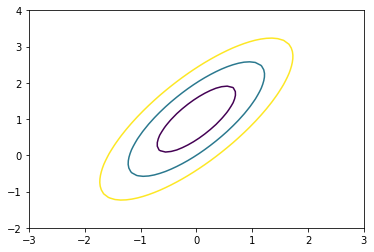

In [49]:
plt.contour(x, y, z, levels=[-2, 0, 3])
plt.ylim(-2, 4)
plt.xlim(-3, 3)

In [52]:
class GradientDescent:
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f = f
        self.df = df
        self.alpha = alpha
        self.eps = eps
        self.path = None
    
    def solve(self, init):
        x = init
        path = []
        grad = self.df(x)
        path.append(x)
        while(grad**2).sum() > self.eps**2:
            x = x - self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

In [54]:
def f(xx):
    x = xx[0]
    y = xx[1]
    
    return 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

def df(xx):
    x = xx[0]
    y = xx[1]
    
    return np.array([10*x - 6*y + 6, -6*x + 6*y - 6])

In [55]:
algo = GradientDescent(f, df)

In [56]:
initial = np.array([1., 1.])

In [57]:
algo.solve(initial)

In [58]:
print(algo.x_)

[3.45722846e-07 1.00000048e+00]


In [59]:
print(algo.opt_)

-2.9999999999997073


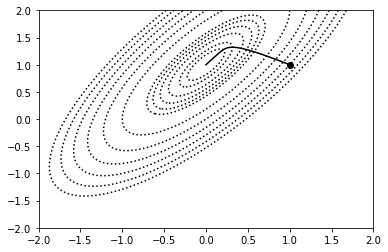

In [66]:
plt.scatter(initial[0], initial[1], color = 'k', marker ='o')
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color='k', linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors='k', linestyles='dotted')